In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [9]:
df = pd.read_csv('Ecommerce Customers.csv')

In [10]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [14]:
df.shape

(500, 8)

In [19]:
type(df['Email'].iloc[0])

str

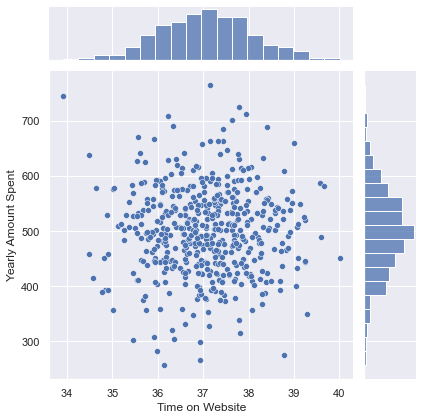

In [21]:
sns.jointplot(x= 'Time on Website', y = 'Yearly Amount Spent', data = df)

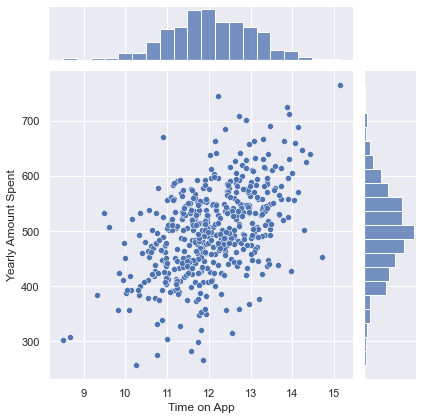

In [22]:
sns.jointplot(x= 'Time on App', y = 'Yearly Amount Spent', data = df)

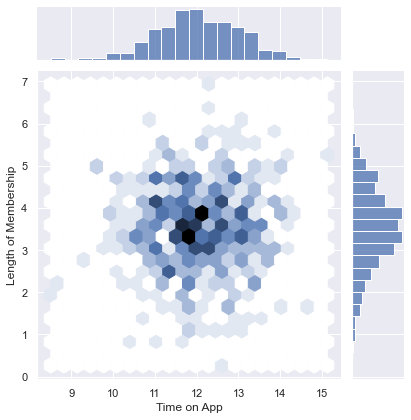

In [40]:
sns.jointplot(x= 'Time on App', y = 'Length of Membership', data = df, kind = 'hex')

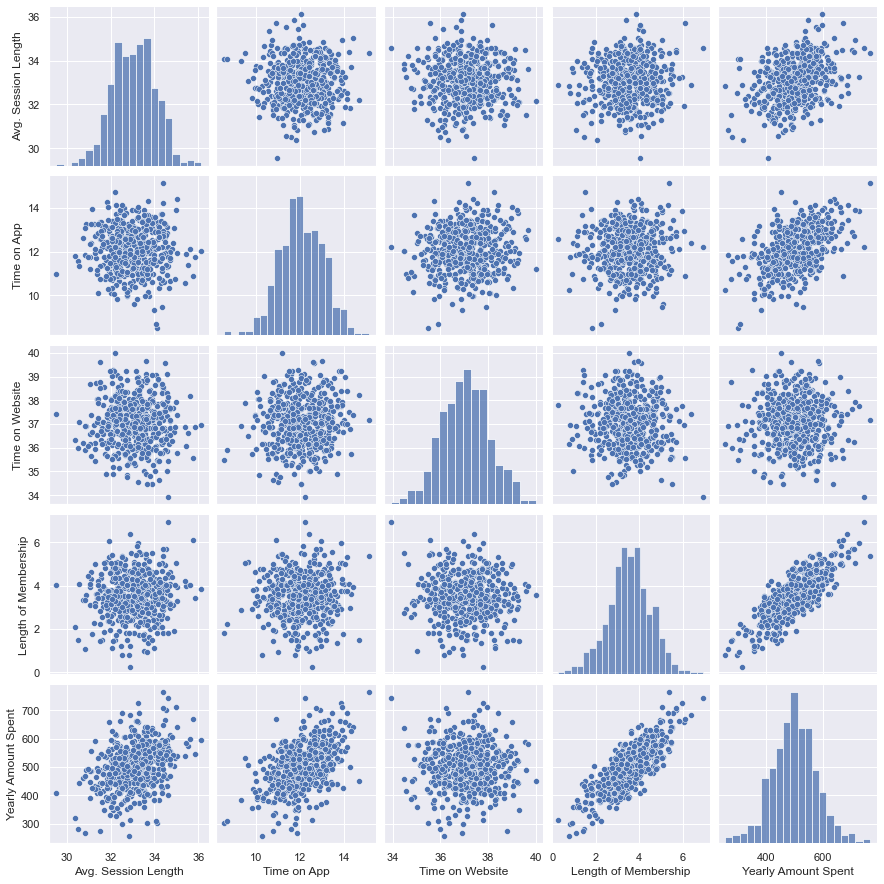

In [26]:
sns.pairplot(df)

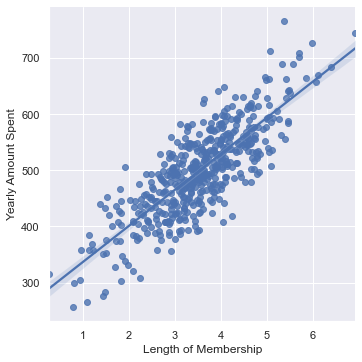

In [41]:
sns.lmplot(x = 'Length of Membership',y = 'Yearly Amount Spent', data =df)

In [43]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [44]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()

In [49]:
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
print('Coefficients:',lm.coef_)

Coefficients: [25.98154972 38.59015875  0.19040528 61.27909654]


In [55]:
Predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

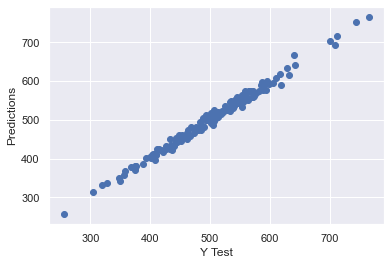

In [60]:
plt.scatter(x = y_test, y = Predictions)

plt.xlabel('Y Test')
plt.ylabel('Predictions')

In [61]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMAE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))

MAE: 7.228148653430826
MSE: 79.81305165097427
RMAE: 8.933815066978624


C:\Users\Sowmik\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

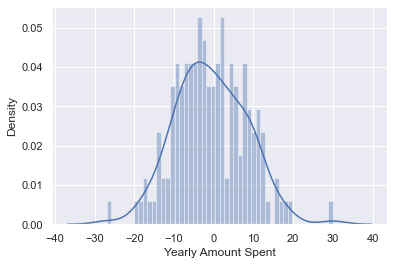

In [70]:
sns.distplot((y_test-Predictions), bins=50)

(array([ 1.,  5., 15., 34., 36., 27., 25.,  5.,  1.,  1.]),
 array([-26.95573072, -21.26030045, -15.56487019,  -9.86943992,
         -4.17400966,   1.5214206 ,   7.21685087,  12.91228113,
         18.6077114 ,  24.30314166,  29.99857192]),
 <BarContainer object of 10 artists>)

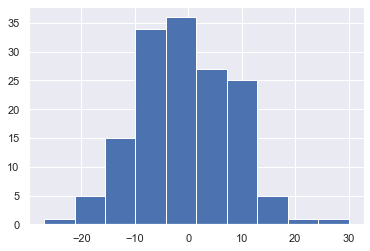

In [75]:
plt.hist(y_test-Predictions)

In [77]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])
coefficients

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
